In [96]:
#f'(x[i]) = (f(x[i+1]) - f(x[i]))/ step

import pandas as pd


#discretisation

def euler(beta, gama, mu):

    S = [0.99]
    I = [0.01]
    R = [0]
    D = [0]
    time = [0]
    step = 0.01

    for _ in range(1, 10000):
        time_update = time[-1] + step

        S_update = (-beta * S[-1] * I[-1])* step + S[-1]
        I_update = (beta * S[-1] * I[-1] - (gama * I[-1]) - mu * I[-1])* step + I[-1]
        R_update = (gama * I[-1])* step + R[-1]
        D_update = (mu * I[-1])* step + D[-1]

        S.append(S_update)
        I.append(I_update)
        R.append(R_update)
        D.append(D_update)
        time.append(time_update)
    dataframe = pd.DataFrame({'Time': time, 'Susceptibles': S, 'Infectés': I, 'Rétablis': R, 'Décès': D})
    return dataframe

In [ ]:
"""beta = 0.5
gama = 0.15
mu = 0.015

pred_data = euler(beta, gama, mu)
pd.set_option('display.max_rows', None)  # Display all rows
print(pred_data)    """

       Time  Susceptibles  Infectés  Rétablis     Décès
0      0.00      0.990000  0.010000  0.000000  0.000000
1      0.01      0.989950  0.010033  0.000015  0.000001
2      0.02      0.989901  0.010066  0.000030  0.000003
3      0.03      0.989851  0.010099  0.000045  0.000005
4      0.04      0.989801  0.010133  0.000060  0.000006
5      0.05      0.989751  0.010166  0.000075  0.000008
6      0.06      0.989701  0.010200  0.000091  0.000009
7      0.07      0.989650  0.010233  0.000106  0.000011
8      0.08      0.989599  0.010267  0.000121  0.000012
9      0.09      0.989549  0.010301  0.000137  0.000014
10     0.10      0.989498  0.010335  0.000152  0.000015
11     0.11      0.989447  0.010369  0.000168  0.000017
12     0.12      0.989395  0.010403  0.000183  0.000018
13     0.13      0.989344  0.010437  0.000199  0.000020
14     0.14      0.989292  0.010472  0.000215  0.000021
15     0.15      0.989240  0.010506  0.000230  0.000023
16     0.16      0.989188  0.010541  0.000246  0

In [59]:
# on choisi mse car on fait un regression lineaire et non pas un classification


In [97]:
"""# Calculate the mean of every 100 rows
predicted_data = pred_data.groupby(pred_data.index // 100).mean()

predicted_data['Jour'] = predicted_data.index
predicted_data = predicted_data[["Jour", "Susceptibles", "Infectés", "Rétablis", "Décès"]]

print(predicted_data)"""


'# Calculate the mean of every 100 rows\npredicted_data = pred_data.groupby(pred_data.index // 100).mean()\n\npredicted_data[\'Jour\'] = predicted_data.index\npredicted_data = predicted_data[["Jour", "Susceptibles", "Infectés", "Rétablis", "Décès"]]\n\nprint(predicted_data)'

In [98]:
real_data = pd.read_csv('sird_dataset.csv')

In [99]:
"""min_size = min(len(real_data), len(predicted_data))
real_data = real_data.iloc[:min_size]
predicted_data = predicted_data.iloc[:min_size]"""

'min_size = min(len(real_data), len(predicted_data))\nreal_data = real_data.iloc[:min_size]\npredicted_data = predicted_data.iloc[:min_size]'

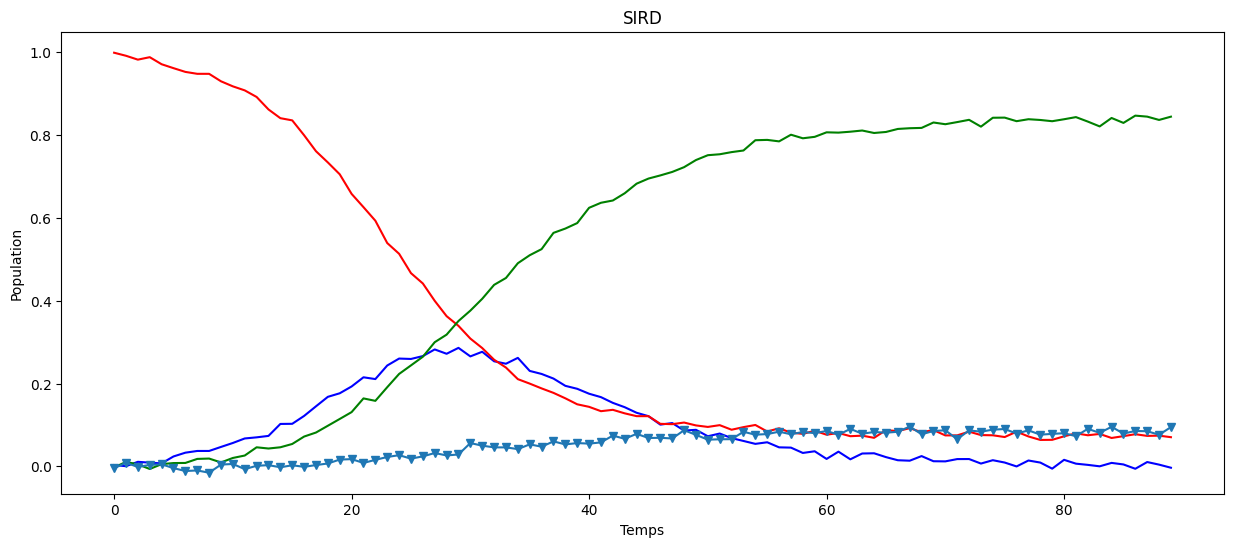

In [100]:
import matplotlib.pyplot as plt

def plot_data(data):
    plt.figure(figsize=(15, 6))
    plt.plot(data['Jour'], data['Infectés'], "b-", label = 'I')
    plt.plot(data['Jour'], data['Susceptibles'], "r-", label = 'S')
    plt.plot(data['Jour'], data['Rétablis'], "g-", label = 'R')
    plt.plot(data['Jour'], data['Décès'], "v-", label = 'D')
    plt.xlabel('Temps')
    plt.ylabel('Population')
    plt.title('SIRD')
    plt.show()

plot_data(real_data)

In [101]:
"""from sklearn.metrics import mean_squared_error
# on peut faire un mse general car on a mis tous les variable sur un echele
mse = ((real_data - predicted_data) ** 2).mean()
total_mse = mse.sum()

total_mse
"""

'from sklearn.metrics import mean_squared_error\n# on peut faire un mse general car on a mis tous les variable sur un echele\nmse = ((real_data - predicted_data) ** 2).mean()\ntotal_mse = mse.sum()\n\ntotal_mse\n'

In [ ]:
import numpy as np
from tqdm.contrib.itertools import product

def grid_search(real_data):
    # Génération des valeurs possibles pour β, γ, et μ
    betas = np.linspace(0.25, 0.5, 4)   # β varie de 0.25 à 0.5
    gamas = np.linspace(0.08, 0.15, 4)  # γ varie de 0.08 à 0.15
    mus = np.linspace(0.005, 0.015, 4)  # μ varie de 0.005 à 0.015
    
    # Initialisation des meilleures valeurs pour β, γ, et μ
    best_beta, best_mu, best_gama = None, None, None
    best_mse = float("inf")  # Initialisation de la meilleure MSE (erreur quadratique moyenne)

    # Boucle sur toutes les combinaisons de β, γ, et μ
    for beta, gama, mu in product(betas, gamas, mus):
        # Prédiction des données avec les paramètres actuels
        predicted_data = euler(beta, gama, mu)
        
        # Agrégation des données prédictives par jour (chaque 100 lignes correspondent à un jour)
        predicted_data = predicted_data.groupby(predicted_data.index // 100).mean()
        
        # Mise à jour des indices pour correspondre à l'échelle et la longueur des données réelles
        predicted_data['Jour'] = predicted_data.index
        predicted_data = predicted_data[["Jour", "Susceptibles", "Infectés", "Rétablis", "Décès"]]
        
        # Ajustement de la taille des deux datasets pour avoir la même longueur
        min_size = min(len(real_data), len(predicted_data))
        real_data = real_data.iloc[:min_size]  # Redimensionnement des données réelles
        predicted_data = predicted_data.iloc[:min_size]  # Redimensionnement des données prédites
        
        # Calcul de la MSE (erreur quadratique moyenne) pour comparer les deux jeux de données
        mse = ((real_data - predicted_data) ** 2).mean()
        actual_mse = mse.sum()  # Somme des MSE pour tous les éléments
        
        # Si la MSE actuelle est meilleure (plus petite) que la meilleure MSE trouvée
        if actual_mse < best_mse:
            best_mse = actual_mse  # Mise à jour de la meilleure MSE
            best_beta, best_gama, best_mu = beta, gama, mu  # Mise à jour des meilleurs paramètres

    # Affichage des meilleurs paramètres
    print(best_beta, best_gama, best_mu)

    # Calcul des prédictions avec les meilleurs paramètres
    best_predicted_data = euler(best_beta, best_gama, best_mu)
    predicted_data = best_predicted_data.groupby(best_predicted_data.index // 100).mean()
    predicted_data['Jour'] = predicted_data.index
    predicted_data = predicted_data[["Jour", "Susceptibles", "Infectés", "Rétablis", "Décès"]]
    
    # Redimensionnement des données prédites pour correspondre à la taille des données réelles
    predicted_data = predicted_data.iloc[:min_size]
    
    # Visualisation des données réelles et prédites
    plot_data(real_data)
    plot_data(predicted_data)
    
    # Retourner les données prédites avec les meilleurs paramètres
    return predicted_data


  0%|          | 0/64 [00:00<?, ?it/s]

100%|██████████| 64/64 [00:02<00:00, 24.22it/s]


0.25 0.08 0.005


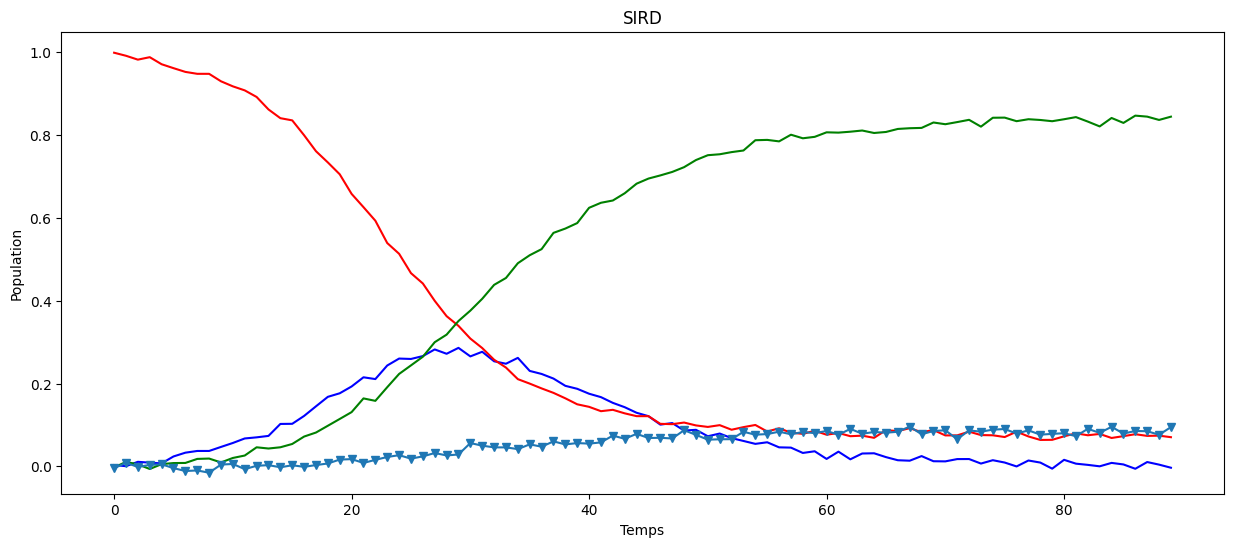

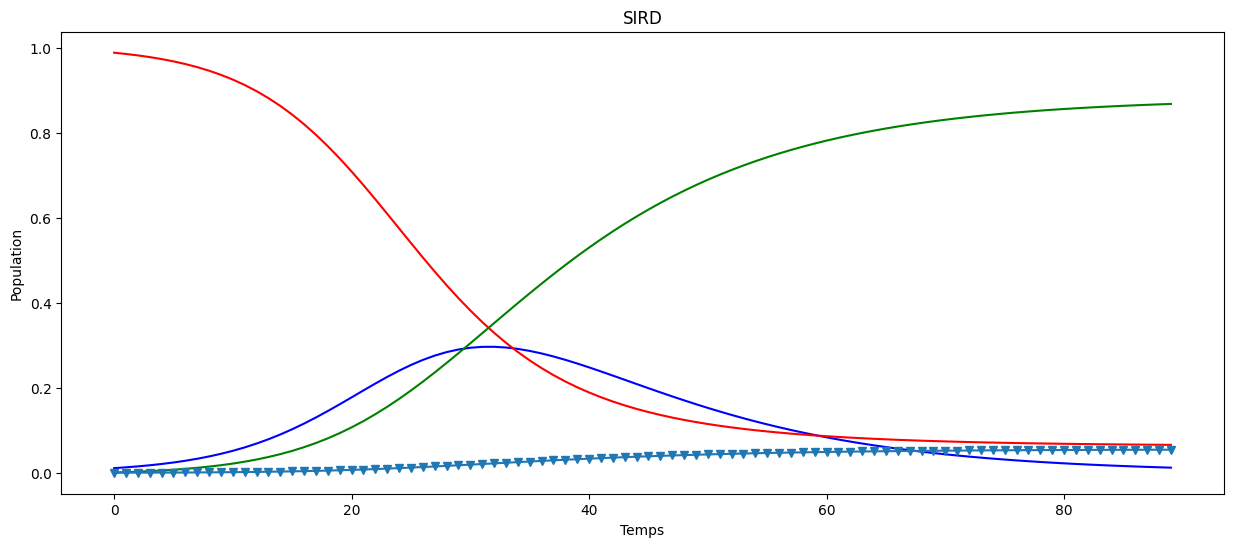

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.988708,0.010848,0.000418,0.000026
1,1,0.985805,0.012751,0.001359,0.000085
2,2,0.982404,0.014977,0.002465,0.000154
3,3,0.978426,0.017576,0.003763,0.000235
4,4,0.973781,0.020603,0.005286,0.000330
5,5,0.968367,0.024121,0.007070,0.000442
6,6,0.962072,0.028198,0.009157,0.000572
7,7,0.954771,0.032909,0.011595,0.000725
8,8,0.946328,0.038332,0.014438,0.000902
9,9,0.936599,0.044547,0.017745,0.001109


In [107]:
grid_search(real_data)

In [ ]:
'''
β  : Taux de transmission de la maladie (probabilité de transmission par contact)
γ  : Taux de guérison (et d'immunisation)
μ  : Taux de mortalité dû à la maladie

1- Quand R inferieur a 1 donc la courbes d'infection descendera et si R est superieur a 1 
le taux d'infection montera rapidement puisuqe y a beacoup de mort et de guerison


'''

In [ ]:
# on met un petit beta

print(euler(0.8, 0.08, 0.005))

#on remarque que quand on change beta R sera inférieur a 1 donc l'epidemie se stabilise

       Time  Susceptibles  Infectés  Rétablis         Décès
0      0.00      0.990000  0.010000  0.000000  0.000000e+00
1      0.01      0.989921  0.010071  0.000008  5.000000e-07
2      0.02      0.989841  0.010142  0.000016  1.003535e-06
3      0.03      0.989761  0.010214  0.000024  1.510630e-06
4      0.04      0.989680  0.010286  0.000032  2.021309e-06
5      0.05      0.989598  0.010358  0.000041  2.535598e-06
6      0.06      0.989516  0.010432  0.000049  3.053521e-06
7      0.07      0.989434  0.010505  0.000057  3.575104e-06
8      0.08      0.989351  0.010580  0.000066  4.100374e-06
9      0.09      0.989267  0.010654  0.000074  4.629354e-06
10     0.10      0.989183  0.010730  0.000083  5.162071e-06
11     0.11      0.989098  0.010805  0.000091  5.698552e-06
12     0.12      0.989012  0.010882  0.000100  6.238822e-06
13     0.13      0.988926  0.010959  0.000109  6.782908e-06
14     0.14      0.988839  0.011036  0.000117  7.330836e-06
15     0.15      0.988752  0.011114  0.0